Dans ce TP, il s'agit de compresser l'image du perroquet à l'aide de k-means. Pour ce faire charger l'image du "coco le perroquet" en appuyant sur le bouton "importer" dans la rubrique fichier.



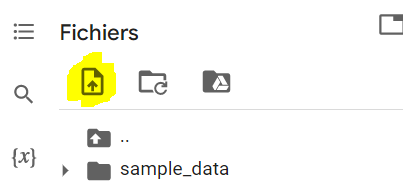

Nous allons charger l'image du perroquet et la stocker dans la variable im

In [2]:
import matplotlib.pyplot as plt

from PIL import Image
im=Image.open('coco.jpg','r')
width,height=im.size
print(width,height)

871 731


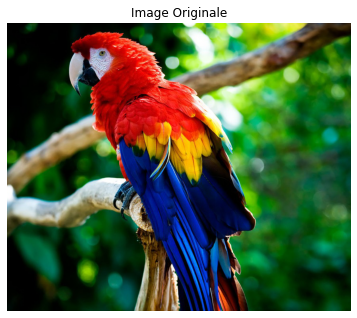

In [3]:
plt.figure(2)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Image Originale')
plt.imshow(im)



Nous allons convertir l'image en tableau numpy et on divise par 255 pour "normaliser les données". La normalisation des données permet de rendre les valeurs de pixel entre 0 et 1

In [4]:
import numpy as np
img_array=np.array(im.getdata())/255
len(img_array)

636701

On va fixer le nombre de couleurs à retenir (ici 10). Vous pouvez changer 10 à autre chose et voir l'effet. Nous allons prendre quelques pixels de l'image pour y effectuer K-Means. Le but c'est de pouvoir extraire 10 groupes de couleurs distinctes dans l'image

In [28]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
n_colors=10
img_array_sample=shuffle(img_array,random_state=0)[:10000]
kmeans=KMeans(n_clusters=n_colors,random_state=0).fit(img_array_sample)
labels=kmeans.predict(img_array)
len(img_array_sample)

10000

Maintenant, on va redissiner l'image en utilisant seulement les 10 couleurs

In [5]:
def recreate_image(cluster_centers,labels,width,height):
  d=cluster_centers.shape[1]
  image_comp=np.zeros((height,width,d))
  label_idx=0
  for i in range(height):
    for j in range(width):
      image_comp[i][j]=cluster_centers[labels[label_idx]]
      label_idx+=1
  return image_comp

Affichage de l'image obtenue

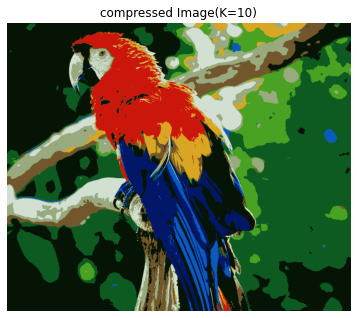

In [6]:
import matplotlib.pyplot as plt
image_comp=recreate_image(kmeans.cluster_centers_,labels,width,height)
plt.figure(2)
plt.clf()
ax=plt.axes([0,0,1,1])
plt.axis('off')
plt.title('compressed Image(K=10)')
plt.imshow(image_comp)